# Day2. 기본과제

Req-1. basic.
ipynb 파일을 생 성 한 후 Hello World 를 출력해 보세요

In [ ]:
print("Hello World")

Hello World


Req-2. basic.ipynb
파일에 일주일은 몇 초 인지 표시하는 코드를 자유롭게 Colab
에 추가 후 실행해 보세요.


In [ ]:
minute = 60
hour = 60*minute
day = 24*hour
week = 7*day
print("일주일은 {}초로 이루어졌습니다.".format(week))

일주일은 604800초로 이루어졌습니다.


Req-3. basic.ipynb
파일에 Colab 의 코드 스니펫 창의 다음의 코드들을 추가 후
실행해 보세요
- Visualization: Linked Brushing in Altair
- Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요
- 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다
실행결과를
그대로 저장해 주세요

In [ ]:
# Visualization: Linked Brushing in Altair


In [ ]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(x='Acceleration') | base.encode(x='Horsepower')

alt.HConcatChart(...)

In [ ]:
# Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


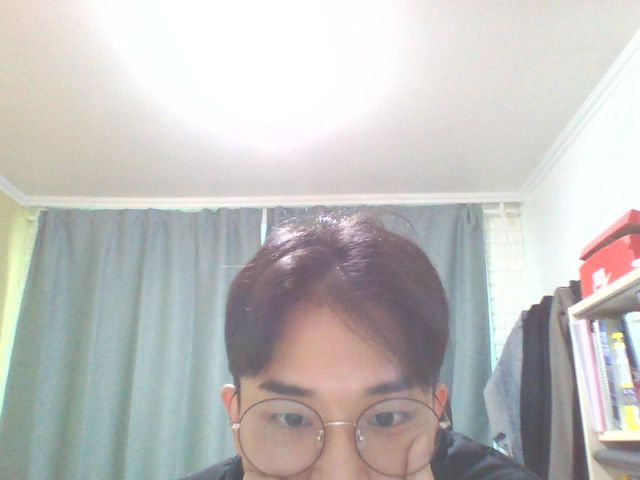

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다 실행결과를 그대로 저장해 주세요


In [ ]:
from vega_datasets import data
stocks = data.stocks()

import altair as alt
alt.Chart(stocks).mark_line().encode(
  x='date:T',
  y='price',
  color='symbol'
).interactive(bind_y=False)

alt.Chart(...)

Req-4. basic.ipynb
파일에 Google Drive 연동을 하는 코드를 추가하고 본인의 구글
드라이브 에 임의의 텍스트파일을 저장하는 코드를 작성해보세요 코드
스니펫 의 Mounting Google Drive in your VM 을 사용해도 무방합니다

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

Hello Google Drive!

Req-5. 다음의 GPU가속 예제코드를 실행해 보고 CPU 사용시 처리시간과 GPU 사용시 처리시간을 비교해 보고 마지막 블럭인“Observe TensorFlow speedup on GPU relative to CPU“의 결과를 복사해서 basic.ipynb의 Req-5 다음에 텍스트 형태로 붙여 주세요.
☞ https://colab.research.google.com/notebooks/gpu.ipynb



Req.5의 실행결과는 다음과 같습니다.

```
This error most likely means that this notebook is not configured to use a GPU.  Change this in Notebook Settings via the command palette (cmd/ctrl-shift-P) or the Edit menu.


---------------------------------------------------------------------------
SystemError                               Traceback (most recent call last)
<ipython-input-5-5f7a297062b3> in <module>()
      9       'configured to use a GPU.  Change this in Notebook Settings via the '
     10       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
---> 11   raise SystemError('GPU device not found')
     12 
     13 def cpu():

SystemError: GPU device not found
```

Req-6. basic.ipynb
파일에 matplotlib 와 OpenCV 의 Drawing API 를 이용하여
화면에 여러 가지 도 형을 그려주는 코드를 작성해 보세요.

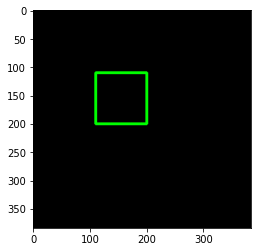

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as pit
# 이미지 버퍼 생성
buffer = np.full((256, 256, 3), 255, np.uint8)

# 이미지 버퍼 가꿈
green_color = (0,255,0)
buffer = cv2.rectangle(img, (110,110), (200,200), green_color, 3)

# 이미지 버퍼 출력
pit.imshow(buffer)
pit.show()